In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [38]:
# Reading
df = pd.read_csv("Data/index_archieve/security.csv", skiprows=2, encoding='cp1251', sep=";")

In [39]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5489 entries, 0 to 5488
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BOARDID         5489 non-null   object 
 1   SECID           5489 non-null   object 
 2   TRADEDATE       5489 non-null   object 
 3   SHORTNAME       5489 non-null   object 
 4   NAME            5489 non-null   object 
 5   CLOSE           5489 non-null   object 
 6   OPEN            5254 non-null   object 
 7   HIGH            5263 non-null   object 
 8   LOW             5263 non-null   object 
 9   VALUE           5263 non-null   object 
 10  DURATION        1517 non-null   float64
 11  YIELD           1517 non-null   float64
 12  DECIMALS        5489 non-null   int64  
 13  CAPITALIZATION  3014 non-null   object 
 14  CURRENCYID      5489 non-null   object 
 15  DIVISOR         2554 non-null   object 
 16  TRADINGSESSION  5489 non-null   int64  
 17  VOLUME          0 non-null      f

In [40]:
# Preproccessing 
df['TRADEDATE'] = pd.to_datetime(df['TRADEDATE'], format='%d.%m.%Y')
df.set_index('TRADEDATE', inplace=True)
df[['OPEN', 'CLOSE', 'HIGH', 'LOW', 'VALUE']] = df[['OPEN', 'CLOSE', 'HIGH', 'LOW', 'VALUE']].apply(lambda x: x.str.replace(',', '.').astype(float))

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5489 entries, 2002-01-03 to 2023-12-20
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BOARDID         5489 non-null   object 
 1   SECID           5489 non-null   object 
 2   SHORTNAME       5489 non-null   object 
 3   NAME            5489 non-null   object 
 4   CLOSE           5489 non-null   float64
 5   OPEN            5254 non-null   float64
 6   HIGH            5263 non-null   float64
 7   LOW             5263 non-null   float64
 8   VALUE           5263 non-null   float64
 9   DURATION        1517 non-null   float64
 10  YIELD           1517 non-null   float64
 11  DECIMALS        5489 non-null   int64  
 12  CAPITALIZATION  3014 non-null   object 
 13  CURRENCYID      5489 non-null   object 
 14  DIVISOR         2554 non-null   object 
 15  TRADINGSESSION  5489 non-null   int64  
 16  VOLUME          0 non-null      float64
dtypes: float64(8), 

МУСОРКА

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Создадим модель ARIMA и обучим её на данных
model = ARIMA(df, order=(1, 1, 1))  # Здесь (1, 1, 1) - порядок модели ARIMA (p, d, q)
model_fit = model.fit()

# Выведем статистику обученной модели
print(model_fit.summary())

# Прогнозирование с использованием обученной модели
forecast = model_fit.forecast(steps=10)  # Здесь 10 - количество шагов для прогнозирования
print(forecast)

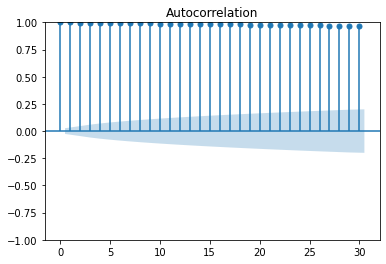

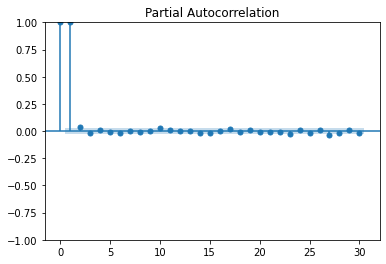

ADF Statistic: -1.4008780935580283
p-value: 0.5818550771079541
Critical Values: {'1%': -3.431548676832535, '5%': -2.8620696953254154, '10%': -2.5670519557818583}
Is the time series stationary? False


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Проверка стационарности временного ряда
def test_stationarity(timeseries):
    # Критерий Дики-Фуллера
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    print('Is the time series stationary?', result[1] < 0.05)

# Создание стационарного временного ряда (если необходимо)
# ...


# Построение ACF и PACF графиков
plot_acf(df['CLOSE'], lags=30)
plot_pacf(df['CLOSE'], lags=30)
plt.show()

# Проверка стационарности временного ряда
test_stationarity(df['CLOSE'])

<AxesSubplot: xlabel='TRADEDATE'>

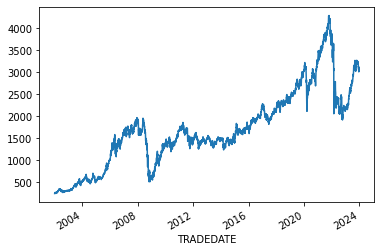

In [49]:
df['CLOSE'].plot()

Index(['CLOSE', 'OPEN', 'HIGH', 'LOW', 'VALUE', 'DURATION', 'YIELD',
       'DECIMALS', 'TRADINGSESSION', 'VOLUME', 'OPEN_diff', 'CLOSE_diff'],
      dtype='object')


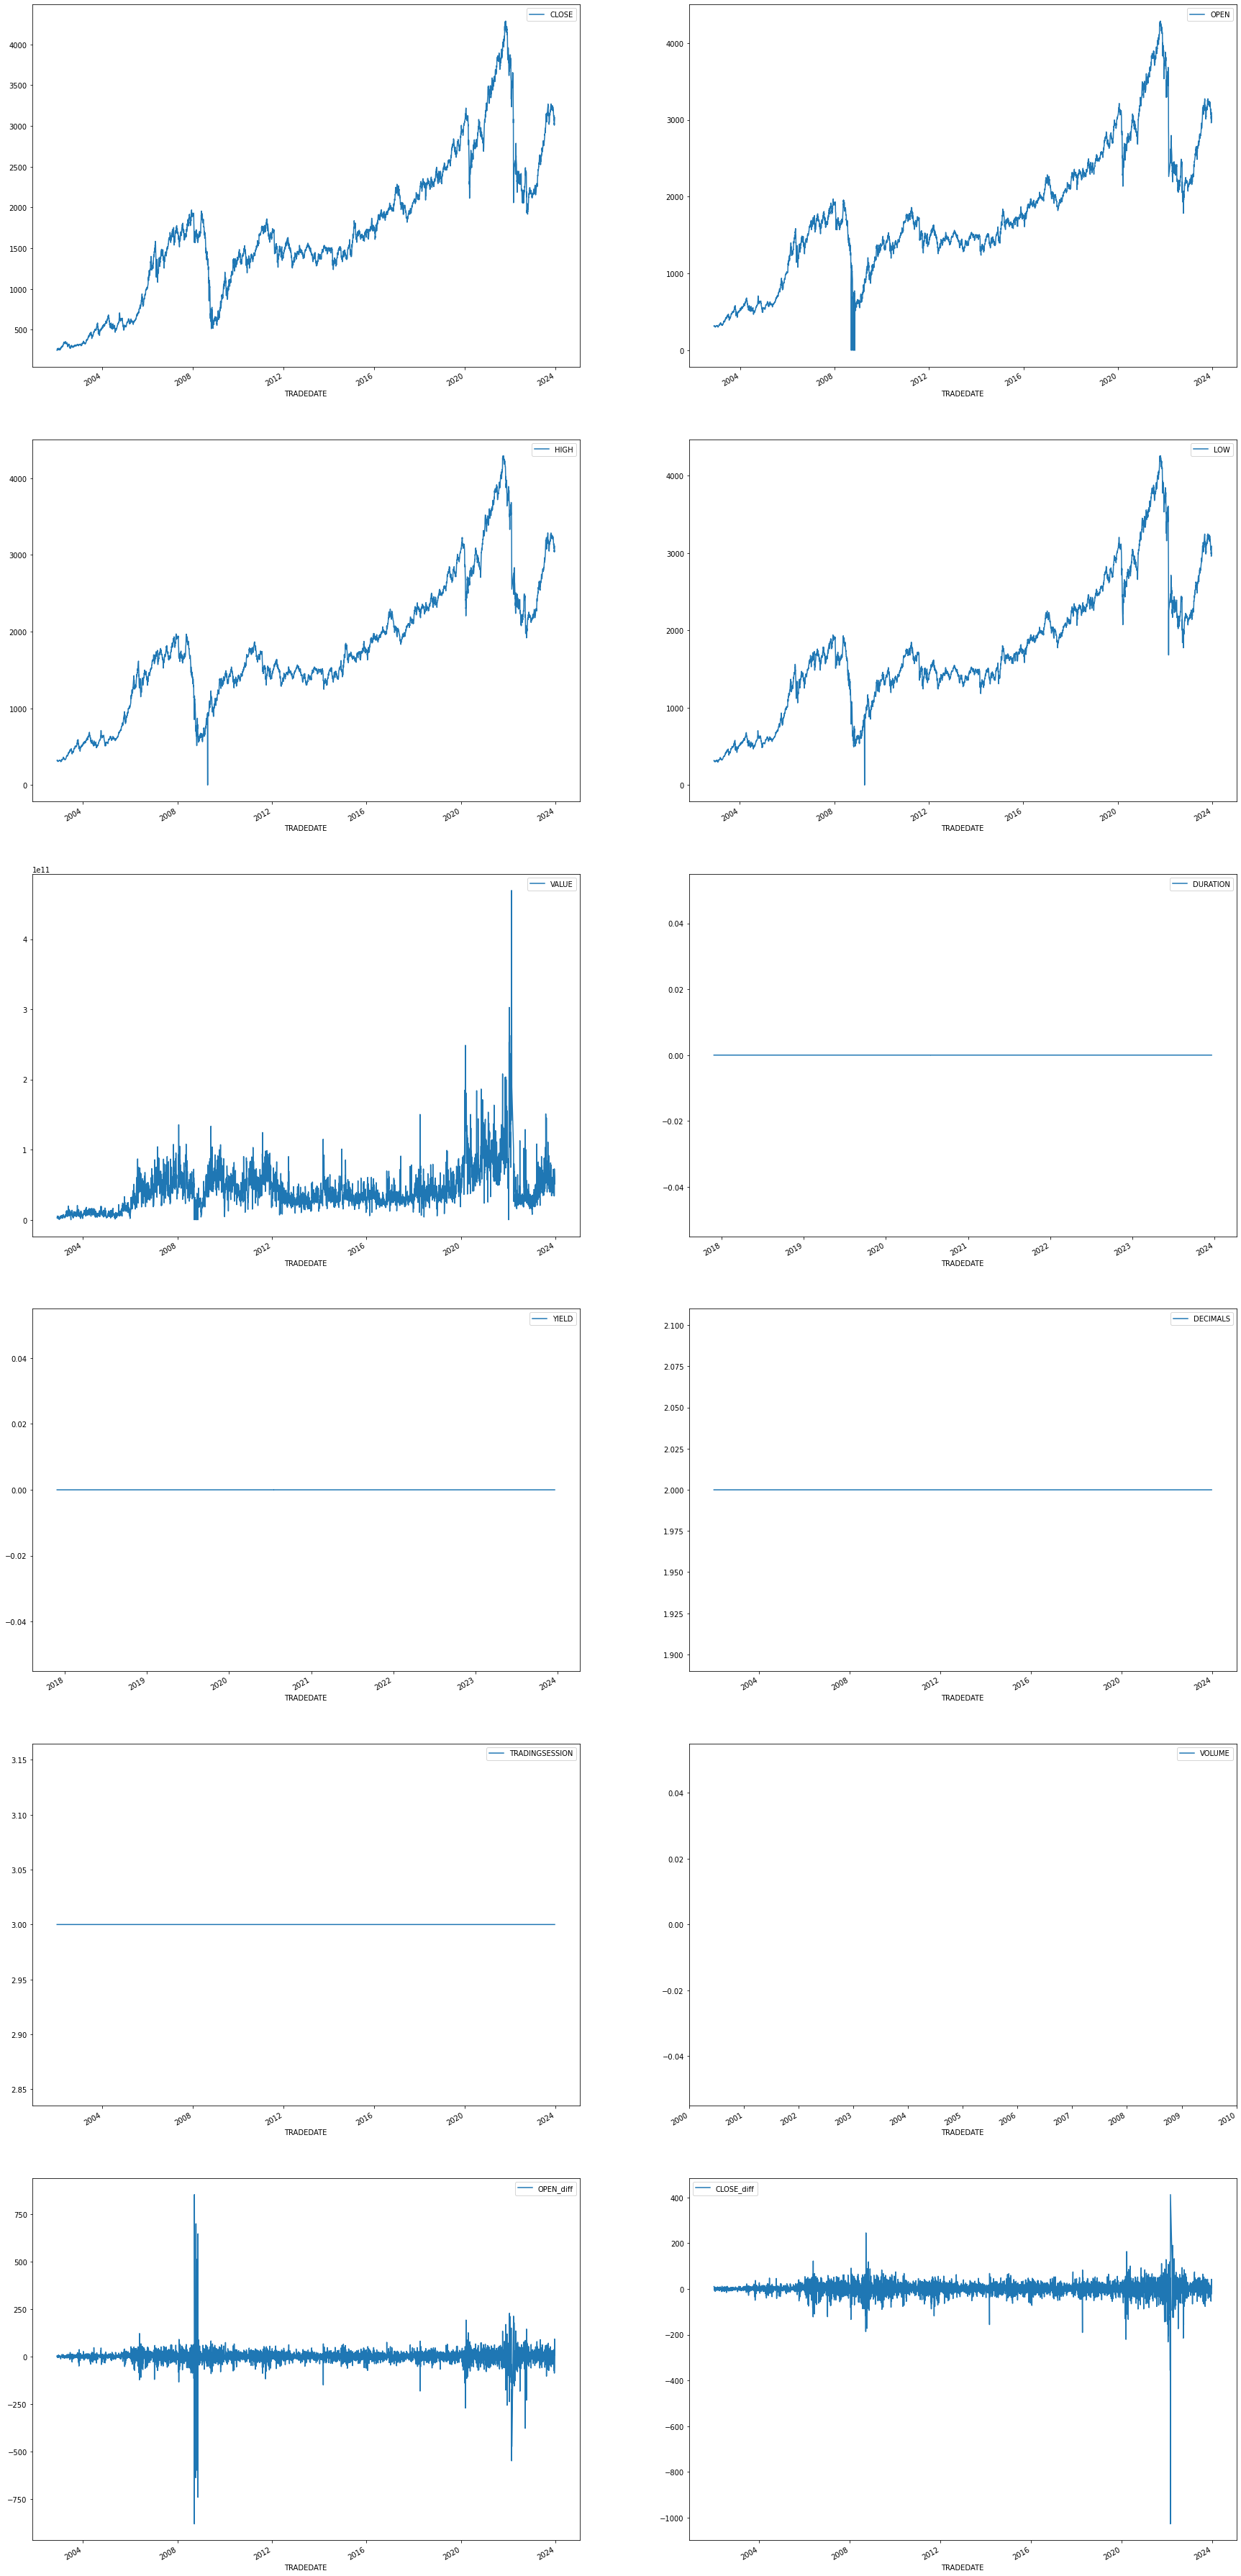

In [57]:
import matplotlib.pyplot as plt

# Получение списка столбцов с числовыми значениями
numeric_columns = df.select_dtypes(include=np.number).columns
print(numeric_columns)

# Создание общего Axes
fig, axes = plt.subplots(nrows=len(numeric_columns)//2, ncols=2, figsize=(30, 6 * len(numeric_columns)))

# Построение графика для каждого числового столбца в отдельном axis
for i, column in enumerate(numeric_columns):
    df[column].plot(ax=axes[i//2][i%2], label=column)
    axes[i//2][i%2].legend()

# Отображение графиков
plt.show()
